# Objective: To compare different embedding models on text classification

In [1]:
%pip install datasets

In [4]:
%pip install fsspec==2023.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requir

## Fetching sentiment classification dataset from HuggingFace

In [18]:
from datasets import load_dataset

ds = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 62464
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 10410
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 10412
    })
})

In [2]:
ds["train"]

Dataset({
    features: ['id', 'text', 'label', 'sentiment'],
    num_rows: 62464
})

In [3]:
pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## Using a few samples from 35k rows

In [20]:
ds_train = ds["train"][:1000]
sentences_train = ds_train["text"]

def encode_sentences(model):
  embeddings = model.encode(sentences_train)
  print("shape:", embeddings.shape)
  return embeddings

## all-MiniLM-L6-v2

In [21]:
from sentence_transformers import SentenceTransformer
model_1 = SentenceTransformer("all-MiniLM-L6-v2")
model_1

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [22]:
embeddings_1 = encode_sentences(model_1)


shape: (1000, 384)


In [23]:
model_2 = SentenceTransformer("all-mpnet-base-v2")
embeddings_2 = encode_sentences(model_2)

shape: (1000, 768)


In [24]:
embeddings_2

array([[-0.07367063,  0.01039916, -0.01001891, ...,  0.00876323,
        -0.06486004,  0.0152324 ],
       [-0.03147734,  0.00203567, -0.0357598 , ...,  0.04750432,
        -0.026505  , -0.02613424],
       [ 0.03868205,  0.09765569, -0.0143212 , ..., -0.00967814,
        -0.01169544, -0.02602775],
       ...,
       [-0.0151376 , -0.03479105, -0.04417028, ...,  0.00285558,
        -0.04602419, -0.00185585],
       [-0.03068396, -0.0246152 ,  0.00040882, ...,  0.029859  ,
        -0.04476351, -0.00990659],
       [-0.07173351,  0.03187737,  0.00950191, ...,  0.00961581,
        -0.06517652, -0.02125286]], dtype=float32)

## all-distilroberta-v1

In [25]:
model_3 = SentenceTransformer("all-distilroberta-v1")
embeddings_3 = encode_sentences(model_3)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

shape: (1000, 768)


In [27]:
embeddings_3

array([[ 0.02079834,  0.02230604, -0.02218299, ..., -0.02651839,
        -0.03684185, -0.02645682],
       [ 0.00854663,  0.03992354,  0.01227355, ..., -0.0274171 ,
        -0.00987934,  0.02339892],
       [-0.02604279,  0.00514179, -0.00812831, ...,  0.07155661,
        -0.03721189,  0.01981207],
       ...,
       [ 0.01820844, -0.06375658, -0.00308816, ..., -0.02875464,
         0.00679416,  0.00231809],
       [ 0.05415282, -0.03116394, -0.02176941, ..., -0.05186376,
        -0.02785608, -0.00707793],
       [ 0.01242009, -0.00056784, -0.01949167, ..., -0.00422616,
         0.00434949,  0.04575966]], dtype=float32)

## multi-qa-mpnet-base-dot-v1

In [28]:
model_4 = SentenceTransformer("multi-qa-mpnet-base-dot-v1")
embeddings_4 = encode_sentences(model_4)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

shape: (1000, 768)


In [29]:
pip install xgboost

## Training popular table data classifier - XGBoost

In [31]:
import xgboost

xgb_1 = xgboost.XGBClassifier()

In [32]:
pip install scikit-learn

In [38]:
embeddings_list = [embeddings_1, embeddings_2, embeddings_3, embeddings_4]
y = ds["train"]["label"][:1000]

## Evaluating performance

In [41]:
import xgboost
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming embeddings_list = [emb1, emb2, emb3, emb4] and y = ds["train"]["label"][:1000]

train_metrics = {"Embedding": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []}
test_metrics = {"Embedding": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []}

for i, emb in enumerate(embeddings_list):
    model = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Split: first 700 for training, next 300 for testing
    X_train, X_test = emb[:700], emb[700:]
    y_train, y_test = y[:700], y[700:]

    model.fit(X_train, y_train)

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Probabilities for AUC
    y_proba_train = model.predict_proba(X_train)[:, 1]
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Evaluate train
    train_metrics["Embedding"].append(f"Embedding_{i+1}")
    train_metrics["Accuracy"].append(accuracy_score(y_train, y_pred_train))
    train_metrics["Precision"].append(precision_score(y_train, y_pred_train, average='weighted'))
    train_metrics["Recall"].append(recall_score(y_train, y_pred_train, average='weighted'))
    train_metrics["F1"].append(f1_score(y_train, y_pred_train, average='weighted'))

    # Evaluate test
    test_metrics["Embedding"].append(f"Embedding_{i+1}")
    test_metrics["Accuracy"].append(accuracy_score(y_test, y_pred_test))
    test_metrics["Precision"].append(precision_score(y_test, y_pred_test, average='weighted'))
    test_metrics["Recall"].append(recall_score(y_test, y_pred_test, average='weighted'))
    test_metrics["F1"].append(f1_score(y_test, y_pred_test, average='weighted'))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:18:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:18:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:18:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:19:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ValueError: All arrays must be of the same length

## Visual comparison

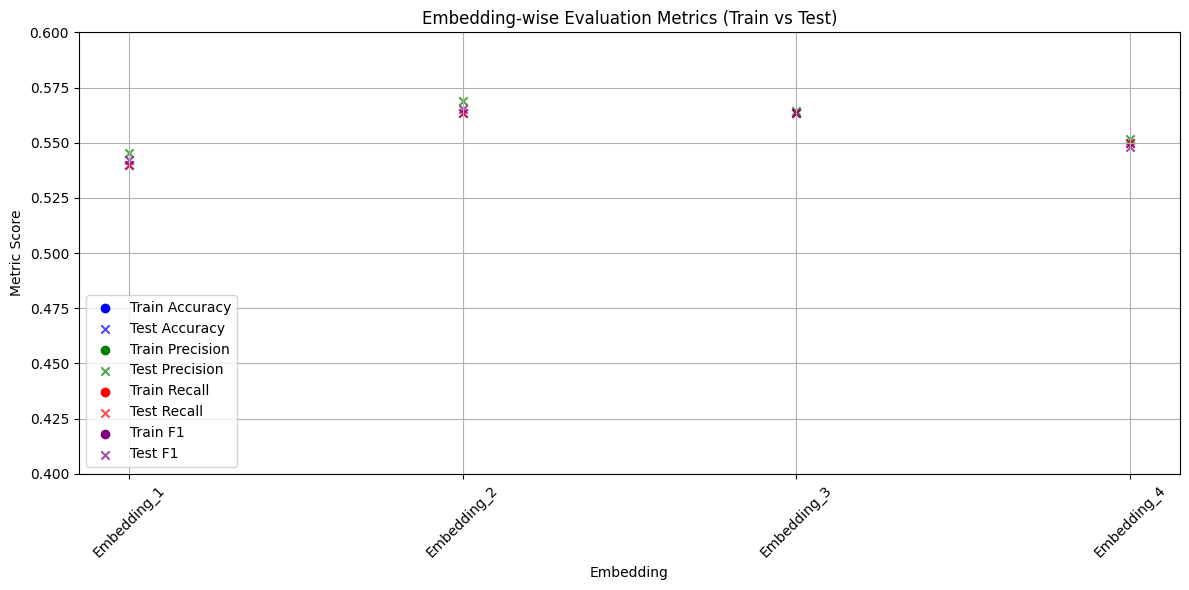

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to DataFrames
df_train = pd.DataFrame(train_metrics)
df_test = pd.DataFrame(test_metrics)

# Metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1"]
colors = {
    "Accuracy": "blue",
    "Precision": "green",
    "Recall": "red",
    "F1": "purple"
}

plt.figure(figsize=(12, 6))

# Scatter plots
for metric in metrics:
    plt.scatter(df_train["Embedding"], df_train[metric],
                label=f"Train {metric}", marker='o', color=colors[metric])
    plt.scatter(df_test["Embedding"], df_test[metric],
                label=f"Test {metric}", marker='x', color=colors[metric], alpha=0.7)

plt.title("Embedding-wise Evaluation Metrics (Train vs Test)")
plt.xlabel("Embedding")
plt.ylabel("Metric Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.ylim(0.4, 0.6)
plt.tight_layout()
plt.show()
